<a href="https://colab.research.google.com/github/disha4u/Adult_Dataset_Visualization-Anaysis/blob/main/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Adult Dataset Visualization

This is part of my Data Visualization course project at ASU.


Data Preprocessing:

Dropping missing values and duplicates

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                'class']

data = data.drop(['fnlwgt'], axis=1) #this column is not demographic information

data = data.replace(' ?', np.nan)

print(len(data))
df=data.dropna()
print(len(df))
df=df.drop_duplicates()

32561
30162


In [2]:
np.random.seed(0)

####User Story 1
<div style="font-size: 16px; line-height: 1.6; margin: 0;">
  <p><strong>Objective:</strong> To understand occupation divide between Men and Women and occupations which pay more.</p>
  <p><strong>Intuition:</strong> Intuition behind using wordcloud is it captures the essence for the 14 occupations very well.</p>
  <p><strong>Inference:</strong> The word cloud shows that Admin-Clerical positions pay less than Executive-Managerial roles. More women work in admin-clerical positions, higher number/percentage of men work in executive-managerial positions.</p>
</div>


In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# perform a group by on gender and join all the occupations to a string
occ=df.groupby(by='sex')['occupation'].apply(lambda x : ' '.join(x))

In [4]:
#occ[' Female']

In [5]:
occ_male = WordCloud(background_color='white')
occ_male.generate(occ[' Male'])
occ_fem=WordCloud(background_color='white')
occ_fem.generate(occ[' Female'])


In [6]:
# perform a group by on class and join all the occupations to a string
occ=df.groupby(by=['class'])['occupation'].apply(lambda x : ' '.join(x))

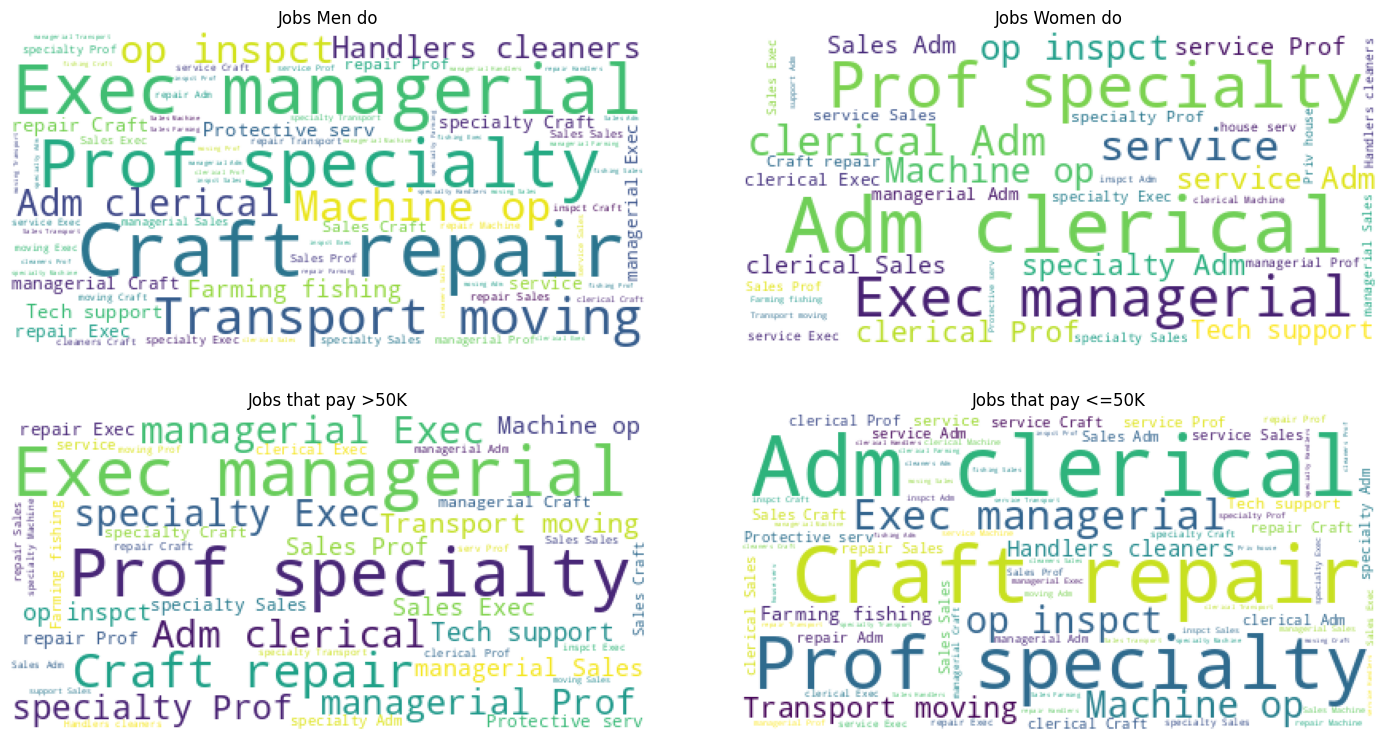

In [7]:
occ_51 = WordCloud(background_color='white')
occ_51.generate(occ[' >50K'])
occ_49=WordCloud(background_color='white')
occ_49.generate(occ[' <=50K'])

plt.rcParams["figure.subplot.bottom"] = 0

plt.rcParams["figure.subplot.top"] = 0.5
plt.rcParams["figure.subplot.wspace"] = 0.1
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(18, 14))

#plt.subplots_adjust(wspace=0.25, hspace=0.25)

ax[1][0].imshow(occ_51,cmap='jet')
ax[1][0].set_title("Jobs that pay >50K")
ax[1][1].imshow(occ_49,cmap='jet')
ax[1][1].set_title("Jobs that pay <=50K")
ax[1][0].axis('off')
ax[1][1].axis('off')

ax[0][0].imshow(occ_male,cmap='jet')
ax[0][0].set_title("Jobs Men do")
ax[0][1].imshow(occ_fem,cmap='jet')
ax[0][1].set_title("Jobs Women do")
ax[0][1].axis('off')
ax[0][0].axis('off')

plt.show()

####User Story 2

<div style="font-size: 16px; line-height: 1.6; margin: 0;">
  <p><strong>Objective:</strong> To understand difference between number of hours worked depending on the workclass i.e. which class makes people work for more hours which less and also analyze does more hours of work lead to higher pay for sure.</p>
  <p><strong>Intuition:</strong> : Hours-per-week is a
numeric variable and Workclass a categorical variable making it perfect for a barplot, we use double
bars to represent class as well.</p>
  <p><strong>Inference:</strong> The bar plots clearly show the more you work, the more you earn .i.e people earning more than 50k tend to work
more than 40hrs each week. Further, People working in state government work less
than other sectors. Addtionally, self employed people work more hours.</p>
</div>


In [8]:
#We select only the 'hours-per-week','workclass' & 'class' for this visual
wc=df[['hours-per-week','workclass','class']]

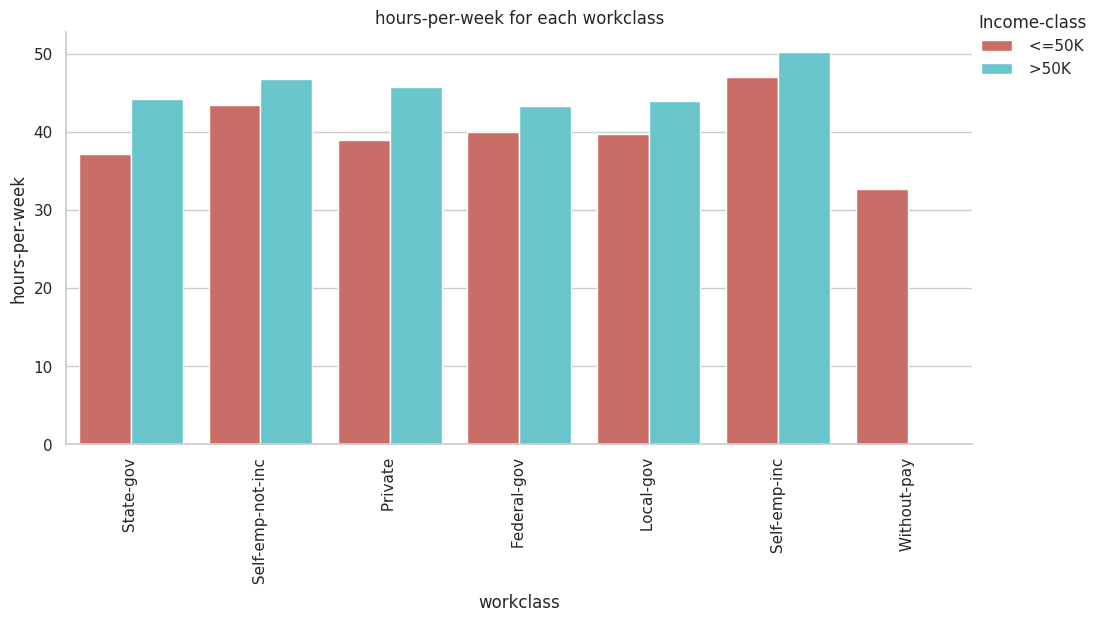

In [9]:
import seaborn as sns

"""we use catplot form seaborn which creates double bar plots with workclass on x axis,
 height/y is hours per week , using bar for this correctly represents the numerical value
 and color/hue is for class """

#sns.set(rc={'figure.figsize':(20,16)})
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=wc, kind="bar",
    x="workclass", y="hours-per-week", hue="class", palette='hls',
    errorbar=None,
    aspect=2
)
plt.xticks(rotation='vertical')
#.despine(left=True)
#g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("Income-class")
sns.move_legend(g,"upper right")
#plt.legend(loc='upper right')
plt.title("hours-per-week for each workclass")
plt.show()

####User Story 3

<div style="font-size: 16px; line-height: 1.6; margin: 0;">
  <p><strong>Objective:</strong> To understand relationship between hours-per-week worked by men and women. Also, how does education level effect hours of work. Subsequently there relation to pay class.</p>
  <p><strong>Intuition:</strong> Since education-num and hours per-week are numeric data both can be represented as line in a parallel-coordinate plot(PCP). Further, parallel coordinate plot allows us to view multiple2 columns also on it and hence we chose to represent our 4 parameters in PCP.
</p>
  <p><strong>Inference:</strong>  Females tend to work lesser number of hours
(green is females and highly dense in the bottom). Also for the top 2 education levels there are higher males. Also for income orange is more dense in
greater than 50k indicating more men earn higher.
</strong> </p>
</div>

In [10]:
reduced_df=pd.DataFrame(df[['sex','hours-per-week','education-num','class']])
# making class into a numerical variable <50K is represented by vale 40 and above 50K by 80
reduced_df['class']=reduced_df['class'].apply(lambda x: 40 if x == ' <=50K' else 80)

In [11]:
from sklearn.preprocessing import MinMaxScaler

#scaling 'hours-per-week','education-num' and 'class' to range [0,1]
scaler = MinMaxScaler()
reduced_df[['hours-per-week','education-num','class']] = scaler.fit_transform(reduced_df[['hours-per-week','education-num','class']])

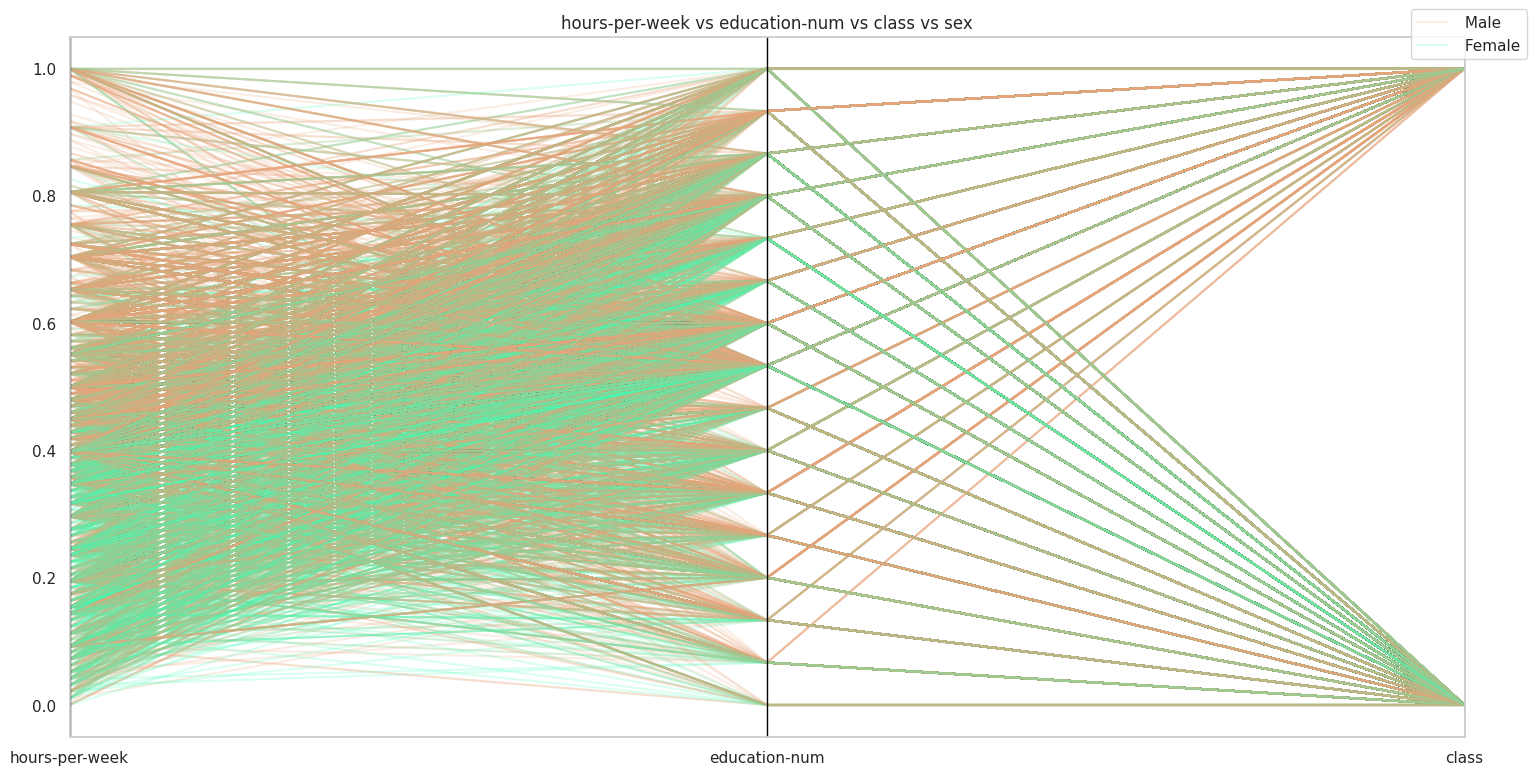

In [12]:
from pandas.plotting import parallel_coordinates

#plt.set(rc={'figure.figsize':(16,12)})
plt.rcParams["figure.figsize"] = (18,14)
parallel_coordinates(reduced_df,'sex', color=['#e9a57b','#42ffb5'],alpha=0.2)
plt.title("hours-per-week vs education-num vs class vs sex")
plt.legend( bbox_to_anchor=(1.05,1.05),loc="upper right")
plt.show()
#legend placing and title left

To understand more about how class relates to education we do the following plot. Which clearly shows more education more pay.

In [13]:
from matplotlib.patches import Polygon
def setBoxColors(bp):
    clrs=['thistle']
    medians=list(range(1))
    for i in range(1):
        box = bp['boxes'][i]
        k=i%2
        bx=[]
        by=[]
        for j in range(5):
            bx.append(box.get_xdata()[j])
            by.append(box.get_ydata()[j])
        boxCoords = np.column_stack([bx, by])
        boxPolygon = Polygon(boxCoords, facecolor=clrs[k])
        ax.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        medianX = []
        medianY = []
        for j in range(2):
            medianX.append(med.get_xdata()[j])
            medianY.append(med.get_ydata()[j])
            ax.plot(medianX, medianY, 'k')
            medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
        ax.plot([np.average(med.get_xdata())])

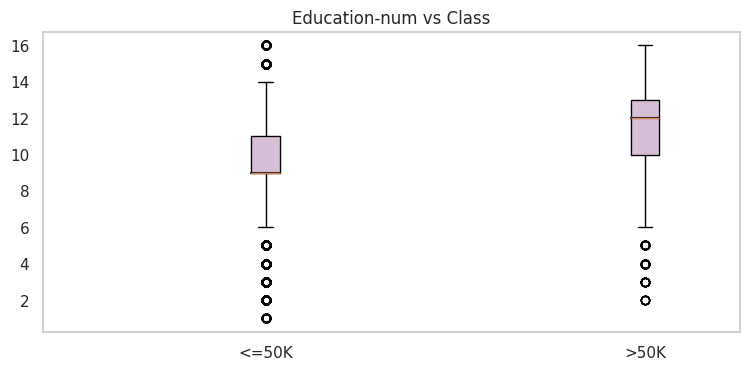

In [14]:
j=1
#k=2
fig = plt.figure(figsize=(9,6))
ax = plt.axes()
plt.grid(False)
bp=plt.boxplot(df[df['class']==' <=50K']['education-num'],positions=[j])
setBoxColors(bp)
bp=plt.boxplot(df[df['class']==' >50K']['education-num'],positions=[j+2])
setBoxColors(bp)
plt.xticks(ticks=[1,3],labels=['<=50K','>50K'])
plt.title("Education-num vs Class")
plt.show()

In [15]:
#plt.scatter(x=df['hours-per-week'],y=df['age'])

####User Story 4

<div style="font-size: 16px; line-height: 1.6; margin: 0;">
  <p><strong>Objective:</strong> To understand how race and gender play a role in deciding pay class.</p>
  <p><strong>Intuition:</strong> We want to show ratio of people earning below 50k for all races hence we chose mosaic plot , the line size on each axis represents the percentage of that variable
</p>
  <p><strong>Inference:</strong>  It can be inferred Percentage of Blacks, Eskimo and others earning lesser than 50K blacks is higher than percentage of whites earning less than 50K for both genders. Further it can be seen that women face double marginalization and fewer women are at a pay >50K for all races.
</strong> </p>
</div>

In [16]:
from statsmodels.graphics.mosaicplot import mosaic

#get indexes for gender
ind=df.groupby(by="sex").indices
ind


{' Female': array([    4,     5,     6, ..., 26901, 26902, 26903]),
 ' Male': array([    0,     1,     2, ..., 26898, 26899, 26900])}

In [17]:
#make 2 data frames 1 for each gender
male=df.iloc[ind[' Male']]
female=df.iloc[ind[' Female']]

In [18]:
male.head(2)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [19]:
female.head(2)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [20]:
from matplotlib import colormaps

colors=colormaps['Set2']
l=colors.colors

In [21]:
colordc={k:v for k,v in zip(df['race'].value_counts().keys(),l)}

In [22]:
props={} #properties dictionary using custom colors for the plot

In [23]:
for x in [' <=50K', ' >50K']:
    for y, col in colordc.items():
        props[(y,x)] ={'color': col}

In [24]:
# mosaic(df, ['race','class'], title='race vs class',
#       gap=0.05, properties=props, labelizer=lambda k :'',label_rotation=(90.0,0.0))
# plt.show()

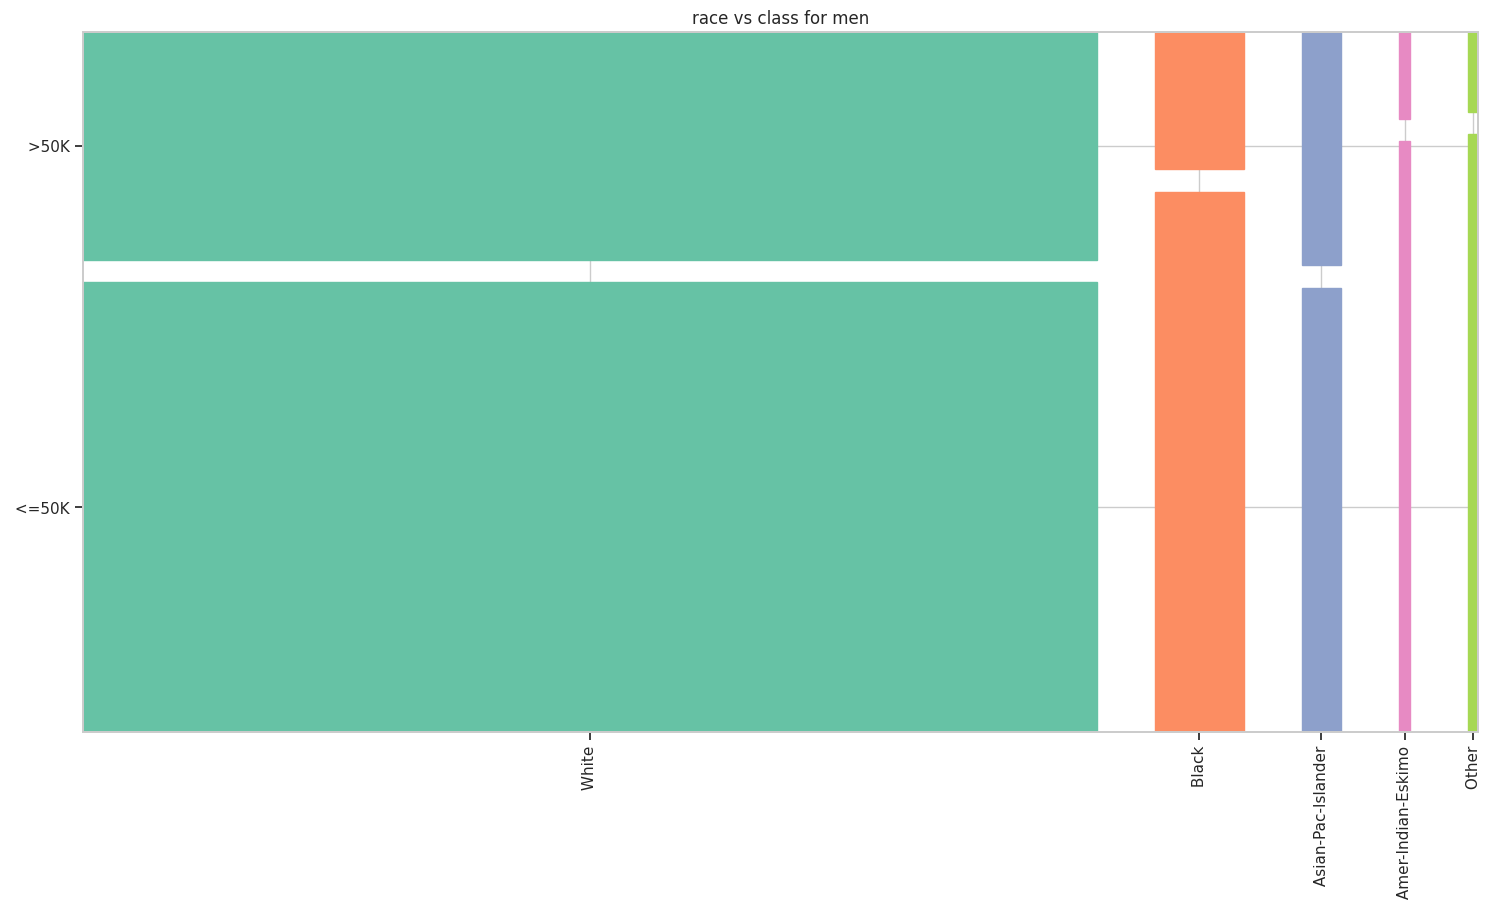

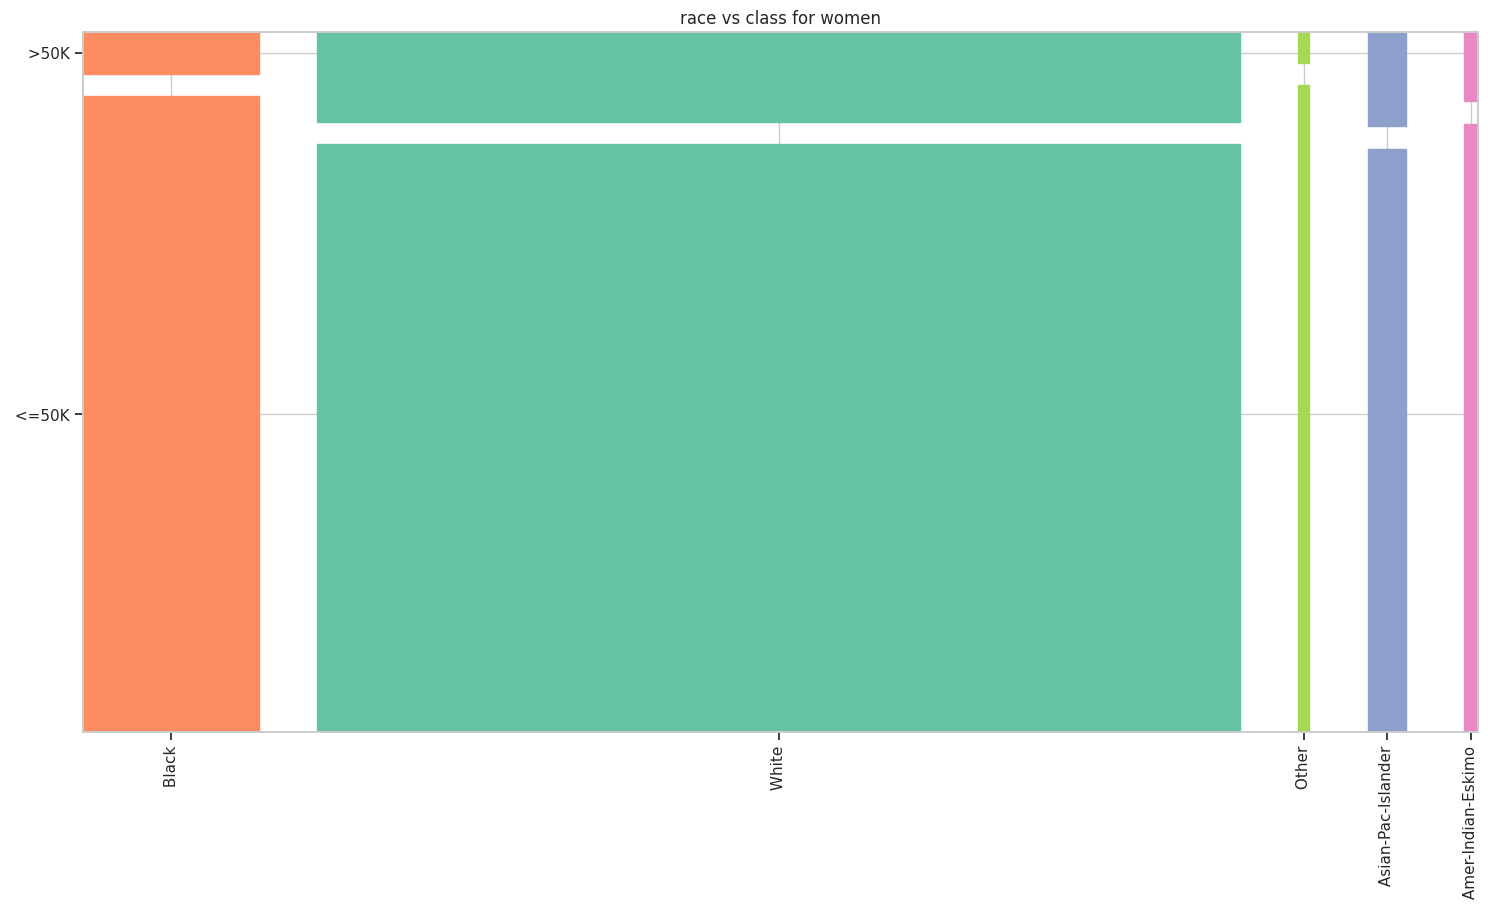

In [25]:
#fig, ax = plt.subplots(1, 2, figsize=(9,7.5))
#plt.subplot(211)
#double marginalization due to race and gender
#plt.rcParams["figure.figsize"] = (8,6)
mosaic(male, ['race','class'], title='race vs class for men',
      gap=0.05, properties=props,labelizer=lambda k :'',label_rotation=(90.0,0.0))
mosaic(female, ['race','class'], title='race vs class for women',
      gap=0.05, properties=props, labelizer=lambda k :'',label_rotation=(90.0,0.0))
#plt.xticks(rotation='vertical')
plt.show()

In [26]:
#our divorced women discriminated against more than divorced men
"""
colordc={k:v for k,v in zip(df['marital-status'].value_counts().keys(),l)}
prop={}
for x in [' <=50K', ' >50K']:
    for y, col in colordc.items():
        props[(y, x)] ={'color': col}
plt.rcParams["figure.figsize"] = (9,7.5)
mosaic(male, ['marital-status','class'], title='race vs class for men',
      gap=0.05, properties=props,labelizer=lambda k :'',label_rotation=(90.0,0.0))
mosaic(female, ['marital-status','class'], title='race vs class for women',
      gap=0.05, properties=props, labelizer=lambda k :'',label_rotation=(90.0,0.0))
#plt.xticks(rotation='vertical')
plt.show()"""

'\ncolordc={k:v for k,v in zip(df[\'marital-status\'].value_counts().keys(),l)}\nprop={}\nfor x in [\' <=50K\', \' >50K\']:\n    for y, col in colordc.items():\n        props[(y, x)] ={\'color\': col}\nplt.rcParams["figure.figsize"] = (9,7.5)\nmosaic(male, [\'marital-status\',\'class\'], title=\'race vs class for men\',\n      gap=0.05, properties=props,labelizer=lambda k :\'\',label_rotation=(90.0,0.0))\nmosaic(female, [\'marital-status\',\'class\'], title=\'race vs class for women\',\n      gap=0.05, properties=props, labelizer=lambda k :\'\',label_rotation=(90.0,0.0))\n#plt.xticks(rotation=\'vertical\')\nplt.show()'

####User Story 5
<div style="font-size: 16px; line-height: 1.6; margin: 0;">
  <p><strong>Objective:</strong>  To understand at which age people begin earning via capital gains, what is the education level of such people and their pay class.</p>
  <p><strong>Intuition:</strong>  Age and capital gains being continuous and numeric data can be represented by scatter plot, line plot needs strong correlation and age and capital gain had correlation of 0.07 only hence scatter plot. Inspired by Gapminder I use qualitative colour scheme for education and size of the dots represent the class.
</p>
  <p><strong>Inference:</strong>  As capital gain increases the earning also is
more. People who have a professional course or at least Bachelors invest more and get more money, high school grads also invest but their earnings are lesser than 50K. People generally with age between 20 and 70 invest in capital.
</p>
</div>

In [27]:
#for this we use rows where capital gain is greater than 0
cgn=pd.DataFrame(df[df['capital-gain']>0])
len(cgn)

2524

In [28]:
#sample cgn data
cgn=cgn.sample(200)

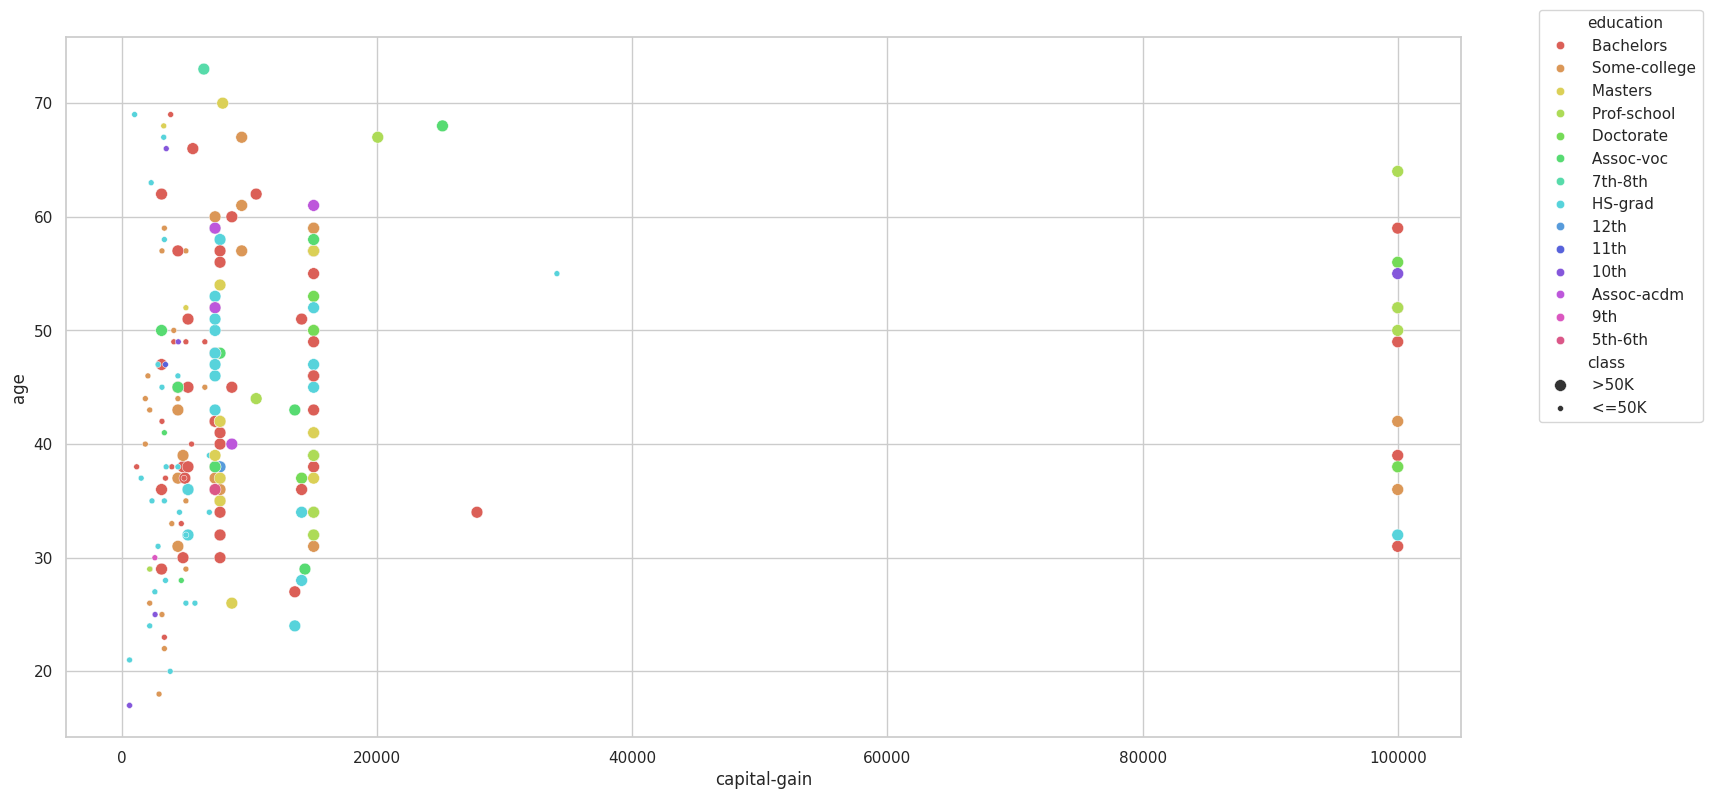

In [29]:
sns.scatterplot(cgn,x=cgn['capital-gain'],y=cgn['age'],hue=cgn['education'],
            size=cgn['class'],palette='hls',size_order=[' >50K', ' <=50K'])
plt.legend(bbox_to_anchor=(1.05,1.05))
plt.show()

In [30]:
"""
trial plot trying different variables for hue and size
sns.scatterplot(df,x=cgn['education'],y=cgn['hours-per-week'],hue=cgn['class'],
            size=cgn['class'],palette='hls',size_order=[' >50K', ' <=50K'])
plt.legend(bbox_to_anchor=(1.05,1.05))
plt.show()
"""

"\ntrial plot trying different variables for hue and size\nsns.scatterplot(df,x=cgn['education'],y=cgn['hours-per-week'],hue=cgn['class'],\n            size=cgn['class'],palette='hls',size_order=[' >50K', ' <=50K'])\nplt.legend(bbox_to_anchor=(1.05,1.05))\nplt.show()\n"

In [31]:
#cgn['size']=cgn['class'].apply(lambda x: 15 if x==' <=50K' else 50)

In [32]:
#plt.scatter(x=cgn['capital-gain'],y=cgn['age'],c=cgn['education-num'],
#            s=cgn['size'],cmap='Set2',)

####User Story 6

<div style="font-size: 16px; line-height: 1.6; margin: 0;">
  <p><strong>Objective:</strong> To understand which occupations and what workclass combo helps earn more.</p>
  <p><strong>Intuition:</strong> For this we use a line plot and bar plot indication percent people above 50K for each workclass in every occupation.
</p>
  <p><strong>Inference:</strong> For most of the occupations, self employed and federal govt have higher percent of people above 50K. Also, it can be seen prof-speciality and exec-managerial people have higher percent of people above 50K.
</p>
</div>

In [40]:
dc={}
plotdata={'occupation':[],'workclass':[],'Percent_above_50K':[]}
# list of occupations
index=[k for k in df['occupation'].value_counts().keys()]
#dictionary of workclass
for k in df['workclass'].value_counts().keys():
  dc[k]=[]

#groupby workclass, occupation and class
gb=df.groupby(by=['workclass','occupation','class'])


#loop over workclasses and occupations and append them to create plotdata
for k in dc.keys():
  for v in index:
    plotdata['occupation'].append(v)
    plotdata['workclass'].append(k)
    if (k,v,' >50K') not in gb.groups.keys():
      plotdata['Percent_above_50K'].append(0)
      continue
    #use length of the groups for the workclass and occupation and pay class above 50 divided by total in group of workclass and occupation to get percent
    percent=len(gb.groups[(k,v,' >50K')])/(len(gb.groups[(k,v,' >50K')])+len(gb.groups[(k,v,' <=50K')]))
    plotdata['Percent_above_50K'].append(percent)

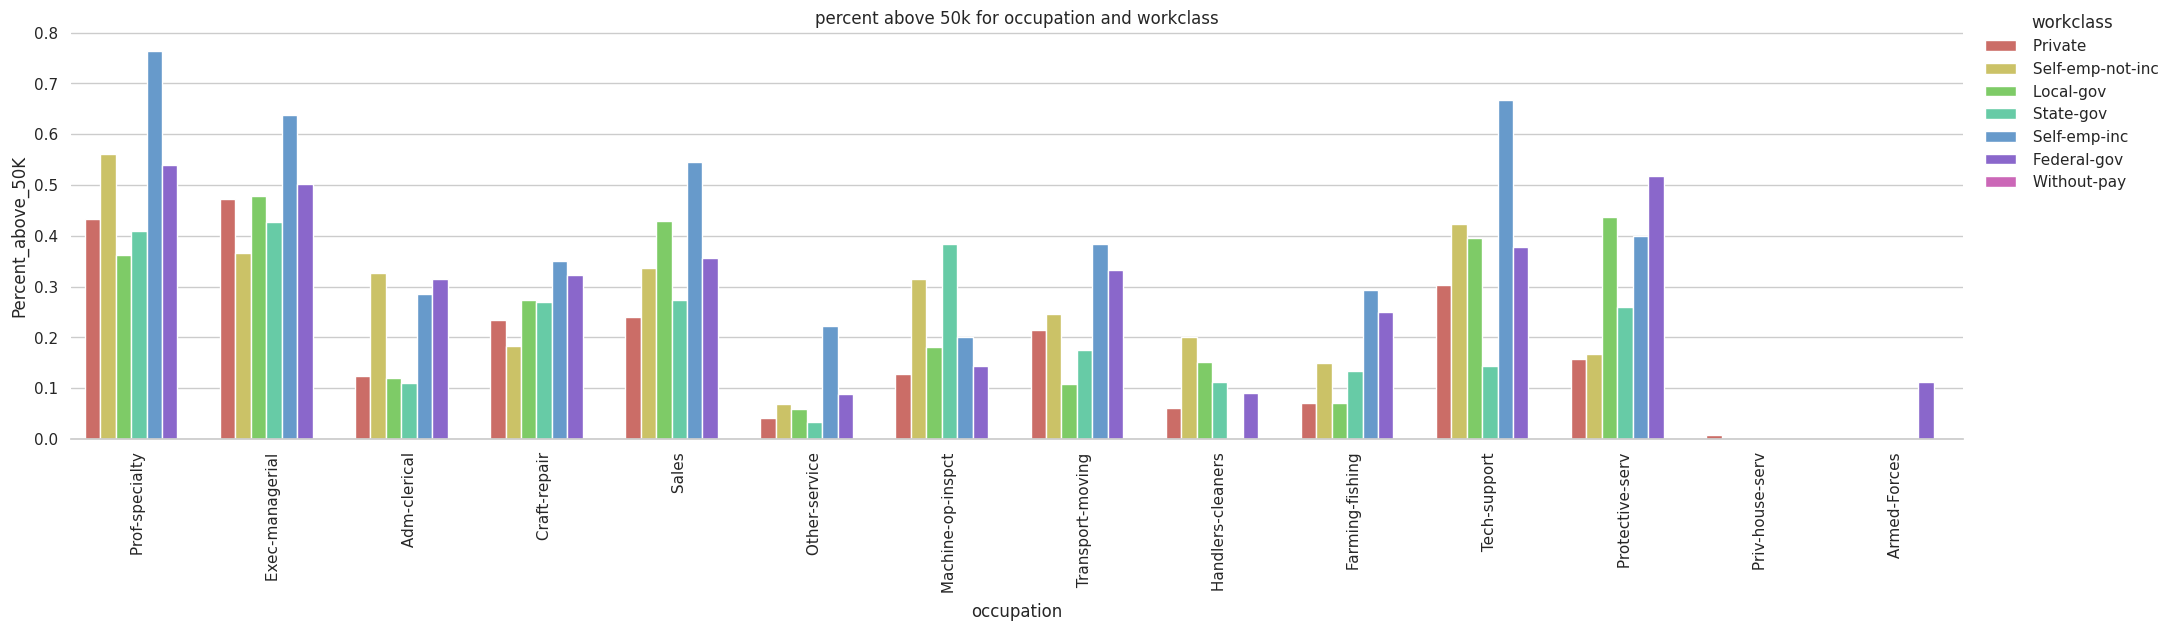

In [41]:
wc_oc=pd.DataFrame(plotdata)
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=wc_oc, kind="bar",
    x="occupation", y="Percent_above_50K", hue="workclass", palette='hls',
    errorbar=None,
    aspect=4

)
plt.xticks(rotation='vertical')
g.despine(left=True)
#g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("workclass")
sns.move_legend(g,"upper right")
#plt.legend(loc='upper right')
plt.title("percent above 50k for occupation and workclass")
plt.show()

In [37]:
"""gp=df.groupby(by='native-country').indices
l50k=[]
m50k=[]
for k in gp:
  l50k.append(len(df[df['class']==' <=50k'].iloc[gp[k]]))
  """

"gp=df.groupby(by='native-country').indices\nl50k=[]\nm50k=[]\nfor k in gp:\n  l50k.append(len(df[df['class']==' <=50k'].iloc[gp[k]]))\n  "